In [2]:
import numpy as np
from time import time
import os
import sys
import scipy
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.interpolate import interp1d
import pandas as pd
import psutil
from tqdm import tqdm
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb
from scipy.linalg import toeplitz
import scipy.linalg as sl
from scipy.signal import convolve2d
from scipy.signal import convolve
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import cv2

%matplotlib inline

In [3]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/func_0'

In [4]:
timestamps = bbb.load_timestamps(os.path.join(directory, 'imaging'))
fictrac = bbb.load_fictrac(os.path.join(directory, 'fictrac'))


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 288.77 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 5.41 sec


In [3]:
brain_path = os.path.join(directory, 'brain_zscored_green.nii')
brain = bbb.load_numpy_brain(brain_path)
dims = bbb.get_dims(brain)


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 26.44 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 2.87 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 15.82 sec


In [4]:
pca_file = os.path.join(directory, 'pca', 'spatial_PCs.nii')
pca_spatial = bbb.load_numpy_brain(pca_file)
pca_ = np.load(os.path.join(directory, 'pca', 'components.npy'))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 46.98 ms


In [22]:
pca_.shape

(10, 4128)

In [26]:
pca.shape

(128, 92, 51, 10)

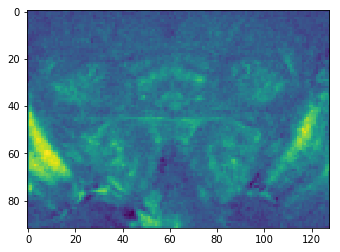

In [5]:
plt.imshow(pca_spatial[:,:,25,0].T)

In [5]:
def interp_fictrac(fictrac, fps, resolution, expt_len):
    behavior = 'dRotLabY'
    sigma = 3
    camera_rate = 1/fps * 1000 # camera frame rate in ms
    
    x_original = np.arange(0,expt_len,camera_rate)
    fictrac_smoothed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=sigma)
    fictrac_smoothed = np.abs(fictrac_smoothed)
    fictrac_interp_temp = interp1d(x_original, fictrac_smoothed, bounds_error = False)
    xnew = np.arange(0,expt_len,resolution) #0 to last time at subsample res
    fictrac_interp = fictrac_interp_temp(xnew)

    # Replace Nans with zeros (for later code)
    np.nan_to_num(fictrac_interp, copy=False);
    
    return fictrac_interp

In [6]:
resolution = 50 #desired resolution in ms
expt_len = 1000*30*60
fps = 50 #of fictrac camera

In [7]:
fictrac_interp = interp_fictrac(fictrac, fps, resolution, expt_len)
xnew = np.arange(0,expt_len,resolution)

In [8]:
np.shape(fictrac_interp)

(36000,)

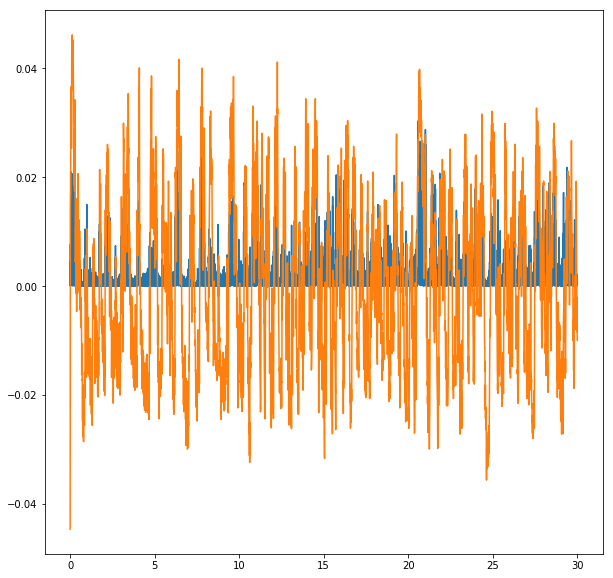

In [94]:
plt.figure(figsize=(10,10))
plt.plot(xnew/1000/60, fictrac_interp)
plt.plot(timestamps[:,25]/1000/60,pca_[0,:])
#plt.xlim(6,10)

In [40]:
### Load Video ###
cap = cv2.VideoCapture(os.path.join(directory, 'fictrac', 'fictrac-20190226_124612-raw.avi'))
i=0
frames = []
ret = True
while ret is True:
    i+=1
    if i%1000 == 0:
        print(i)
    # Capture frame-by-frame
    ret, frame = cap.read()
    rets.append(ret)
    frames.append(frame)
cap.release()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000


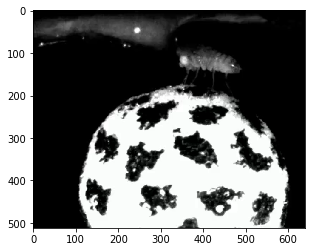

In [47]:
plt.imshow(frames[0])

In [86]:
def round_down_to_base(x, base=20):
    return [math.floor(i/base) for i in x]
indicies = round_down_to_base(timestamps[:,25])
timestamps_expaned = np.zeros((len(fictrac_interp)))

In [155]:
np.searchsorted(indicies, 10)

0

0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
128
132
136
140
144
148
152
156
160
164
168
172
176
180
184
188
192
196
200
204
208
212
216
220
224
228
232
236
240
244
248
252
256
260
264
268
272
276
280
284
288
292
296
300
304
308
312
316
320
324
328
332
336
340
344
348
352
356
360
364
368
372
376
380
384
388
392
396
400
404
408
412
416
420
424
428
432
436
440
444
448
452
456
460
464
468
472
476
480
484
488
492
496
500
504
508
512
516
520
524
528
532
536
540
544
548
552
556
560
564
568
572
576
580
584
588
592
596
600
604
608
612
616
620
624
628
632
636
640
644
648
652
656
660
664
668
672
676
680
684
688
692
696
700
704
708
712
716
720
724
728
732
736
740
744
748
752
756
760
764
768
772
776
780
784
788
792
796
800
804
808
812
816
820
824
828
832
836
840
844
848
852
856
860
864
868
872
876
880
884
888
892
896
900
904
908
912
916
920
924
928
932
936
940
944
948
952
956
960
964
968
972
976
980
984
988
992
996


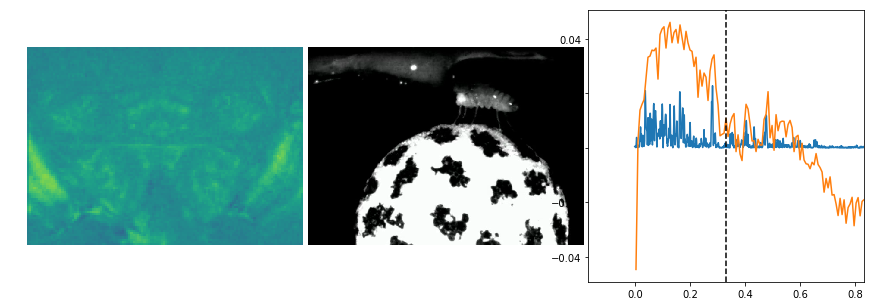

In [181]:
fig = plt.figure(figsize=(15,5))
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/func_0/movie_20190805-1208'
ms_to_min = 1000*60
for i in range(0,1000,4):
    plt.clf()
    print(i)
    plt.subplot(131)
    plt.axis('off')
    idx = np.searchsorted(indicies, i)
    plt.imshow(np.multiply(pca_spatial[:,:,25,0].T, pca_[0,idx]+0.02),vmin=-1,vmax=1)

    plt.subplot(132)
    plt.axis('off')
    plt.imshow(frames[i][:460,:,:])

    plt.subplot(133)
    #plt.axis('off')
    plt_idx = i*20/ms_to_min
    plt.plot(xnew/ms_to_min, fictrac_interp)
    plt.plot(timestamps[:,25]/ms_to_min,pca_[0,:])
    plt.axvline(plt_idx,color='k',linestyle='--')
    offset = 0.5
    plt.xlim(plt_idx-offset,plt_idx+offset)

    # Create an alpha channel based on weight values
    # Any value whose absolute value is > value will have zero transparency
#     important_number = .03 # This value really changes how alpha channel overlay looks
#     alphas = Normalize(0, important_number, clip=True)(brain_glm)
#     alphas = np.clip(alphas, 0, 1)  # alpha value clipped at the bottom

#     # Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
#     colors = Normalize(0, 0.07)(brain_glm)
#     cmap = plt.cm.hot
#     colors = cmap(colors)

#     # Now set the alpha channel to the one we created above
#     colors[..., -1] = alphas
#     plt.imshow(colors[:,:,i],alpha=1)

    plt.subplots_adjust(wspace=.02, hspace=0)
    
    fname = os.path.join(save_path, '{0:05d}.png'.format(i))
    #plt.show()
    plt.savefig(fname,dpi=50,bbox_inches='tight')

In [300]:
fictrac_times.shape

(90000,)

In [297]:
expt_len

1800000

In [299]:
fictrac_times = np.arange(0,expt_len,1/fps*1000)

In [301]:
fictrac_times = np.arange(0,expt_len,1/fps*1000)
pca_interp_temp = interp1d(timestamps[:,25], pca_[0,:], bounds_error = False)
pca_interp = pca_interp_temp(fictrac_times)

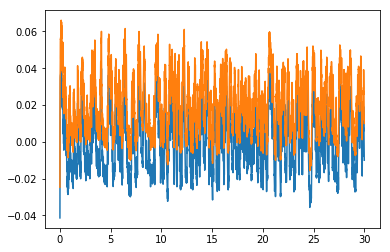

In [289]:
plt.plot(fictrac_times/ms_to_min,pca_interp)
plt.plot(timestamps[:,25]/ms_to_min,pca_[0,:]+0.02)

In [284]:
len(timestamps[:,25])

4128

In [ ]:
# i will go to 90,000
# but, need it to go to 36,000

In [302]:
pca_interp.shape

(90000,)

In [ ]:
fig = plt.figure(figsize=(15,3.7))
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/func_0/movie_20190805-1208'
ms_to_min = 1000*60

for i in range(0,90000,2):
    plt.clf()
    print(i)
    
    ax1 = fig.add_axes([0, 1, 1, 0.8])
    ax2 = fig.add_axes([.58, 1, 0.4, 0.8])
    ax3 = fig.add_axes([.92, 1, 0.3, 0.8])
    
    ###### PLOT 1 ######
    ax1.axis('off')
    ax1.imshow(meanbrain[:,:,25].T,cmap='gray')
    activity = np.multiply(pca_spatial[:,:,25,0].T, pca_interp[i]+0.02)

    # Create an alpha channel based on weight values
    # Any value whose absolute value is > value will have zero transparency
    important_number = .15 # This value really changes how alpha channel overlay looks
    alphas = Normalize(0, important_number, clip=True)(activity)
    alphas = np.clip(alphas, 0, 1)  # alpha value clipped at the bottom

    # Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
    colors = Normalize(0, 1)(activity)
    cmap = plt.cm.hot
    colors = cmap(colors)

    # Now set the alpha channel to the one we created above
    colors[..., -1] = alphas
    ax1.imshow(colors[:,:],alpha=1)

    ###### PLOT 2 ######
    ax2.axis('off')
    ax2.imshow(frames[i][:460,:,:])

    ###### PLOT 3 ######
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.yaxis.set_visible(False)
    plt.xlabel('Time, min')
    
    plt_idx = i*20/ms_to_min
    ax3.plot(xnew/ms_to_min, fictrac_interp*2,label='Behavior',color='k')
    ax3.plot(timestamps[:,25]/ms_to_min,pca_[0,:]+0.02,label='PC1',color='r')
    ax3.axvline(plt_idx,color='k',linestyle='--')
    offset = 0.5
    plt.xlim(plt_idx-offset,plt_idx+offset)
    plt.ylim(0,.07)
    plt.legend(loc=2)

    plt.subplots_adjust(wspace=.02, hspace=0)
    
    fname = os.path.join(save_path, '{0:05d}.png'.format(i))
    plt.savefig(fname,dpi=100,bbox_inches='tight')

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

3500
3502
3504
3506
3508
3510
3512
3514
3516
3518
3520
3522
3524
3526
3528
3530
3532
3534
3536
3538
3540
3542
3544
3546
3548
3550
3552
3554
3556
3558
3560
3562
3564
3566
3568
3570
3572
3574
3576
3578
3580
3582
3584
3586
3588
3590
3592
3594
3596
3598
3600
3602
3604
3606
3608
3610
3612
3614
3616
3618
3620
3622
3624
3626
3628
3630
3632
3634
3636
3638
3640
3642
3644
3646
3648
3650
3652
3654
3656
3658
3660
3662
3664
3666
3668
3670
3672
3674
3676
3678
3680
3682
3684
3686
3688
3690
3692
3694
3696
3698
3700
3702
3704
3706
3708
3710
3712
3714
3716
3718
3720
3722
3724
3726
3728
3730
3732
3734
3736
3738
3740
3742
3744
3746
3748
3750
3752
3754
3756
3758
3760
3762
3764
3766
3768
3770
3772
3774
3776
3778
3780
3782
3784
3786
3788
3790
3792
3794
3796
3798
3800
3802
3804
3806
3808
3810
3812
3814
3816
3818
3820
3822
3824
3826
3828
3830
3832
3834
3836
3838
3840
3842
3844
3846
3848
3850
3852
3854
3856
3858
3860
3862
3864
3866
3868
3870
3872
3874
3876
3878
3880
3882
3884
3886
3888
3890
3892
3894
3896
3898


6778
6780
6782
6784
6786
6788
6790
6792
6794
6796
6798
6800
6802
6804
6806
6808
6810
6812
6814
6816
6818
6820
6822
6824
6826
6828
6830
6832
6834
6836
6838
6840
6842
6844
6846
6848
6850
6852
6854
6856
6858
6860
6862
6864
6866
6868
6870
6872
6874
6876
6878
6880
6882
6884
6886
6888
6890
6892
6894
6896
6898
6900
6902
6904
6906
6908
6910
6912
6914
6916
6918
6920
6922
6924
6926
6928
6930
6932
6934
6936
6938
6940
6942
6944
6946
6948
6950
6952
6954
6956
6958
6960
6962
6964
6966
6968
6970
6972
6974
6976
6978
6980
6982
6984
6986
6988
6990
6992
6994
6996
6998
7000
7002
7004
7006
7008
7010
7012
7014
7016
7018
7020
7022
7024
7026
7028
7030
7032
7034
7036
7038
7040
7042
7044
7046
7048
7050
7052
7054
7056
7058
7060
7062
7064
7066
7068
7070
7072
7074
7076
7078
7080
7082
7084
7086
7088
7090
7092
7094
7096
7098
7100
7102
7104
7106
7108
7110
7112
7114
7116
7118
7120
7122
7124
7126
7128
7130
7132
7134
7136
7138
7140
7142
7144
7146
7148
7150
7152
7154
7156
7158
7160
7162
7164
7166
7168
7170
7172
7174
7176


10046
10048
10050
10052
10054
10056
10058
10060
10062
10064
10066
10068
10070
10072
10074
10076
10078
10080
10082
10084
10086
10088
10090
10092
10094
10096
10098
10100
10102
10104
10106
10108
10110
10112
10114
10116
10118
10120
10122
10124
10126
10128
10130
10132
10134
10136
10138
10140
10142
10144
10146
10148
10150
10152
10154
10156
10158
10160
10162
10164
10166
10168
10170
10172
10174
10176
10178
10180
10182
10184
10186
10188
10190
10192
10194
10196
10198
10200
10202
10204
10206
10208
10210
10212
10214
10216
10218
10220
10222
10224
10226
10228
10230
10232
10234
10236
10238
10240
10242
10244
10246
10248
10250
10252
10254
10256
10258
10260
10262
10264
10266
10268
10270
10272
10274
10276
10278
10280
10282
10284
10286
10288
10290
10292
10294
10296
10298
10300
10302
10304
10306
10308
10310
10312
10314
10316
10318
10320
10322
10324
10326
10328
10330
10332
10334
10336
10338
10340
10342
10344
10346
10348
10350
10352
10354
10356
10358
10360
10362
10364
10366
10368
10370
10372
10374
10376
1037

12778
12780
12782
12784
12786
12788
12790
12792
12794
12796
12798
12800
12802
12804
12806
12808
12810
12812
12814
12816
12818
12820
12822
12824
12826
12828
12830
12832
12834
12836
12838
12840
12842
12844
12846
12848
12850
12852
12854
12856
12858
12860
12862
12864
12866
12868
12870
12872
12874
12876
12878
12880
12882
12884
12886
12888
12890
12892
12894
12896
12898
12900
12902
12904
12906
12908
12910
12912
12914
12916
12918
12920
12922
12924
12926
12928
12930
12932
12934
12936
12938
12940
12942
12944
12946
12948
12950
12952
12954
12956
12958
12960
12962
12964
12966
12968
12970
12972
12974
12976
12978
12980
12982
12984
12986
12988
12990
12992
12994
12996
12998
13000
13002
13004
13006
13008
13010
13012
13014
13016
13018
13020
13022
13024
13026
13028
13030
13032
13034
13036
13038
13040
13042
13044
13046
13048
13050
13052
13054
13056
13058
13060
13062
13064
13066
13068
13070
13072
13074
13076
13078
13080
13082
13084
13086
13088
13090
13092
13094
13096
13098
13100
13102
13104
13106
13108
1311

15510
15512
15514
15516
15518
15520
15522
15524
15526
15528
15530
15532
15534
15536
15538
15540
15542
15544
15546
15548
15550
15552
15554
15556
15558
15560
15562
15564
15566
15568
15570
15572
15574
15576
15578
15580
15582
15584
15586
15588
15590
15592
15594
15596
15598
15600
15602
15604
15606
15608
15610
15612
15614
15616
15618
15620
15622
15624
15626
15628
15630
15632
15634
15636
15638
15640
15642
15644
15646
15648
15650
15652
15654
15656
15658
15660
15662
15664
15666
15668
15670
15672
15674
15676
15678
15680
15682
15684
15686
15688
15690
15692
15694
15696
15698
15700
15702
15704
15706
15708
15710
15712
15714
15716
15718
15720
15722
15724
15726
15728
15730
15732
15734
15736
15738
15740
15742
15744
15746
15748
15750
15752
15754
15756
15758
15760
15762
15764
15766
15768
15770
15772
15774
15776
15778
15780
15782
15784
15786
15788
15790
15792
15794
15796
15798
15800
15802
15804
15806
15808
15810
15812
15814
15816
15818
15820
15822
15824
15826
15828
15830
15832
15834
15836
15838
15840
1584

18242
18244
18246
18248
18250
18252
18254
18256
18258
18260
18262
18264
18266
18268
18270
18272
18274
18276
18278
18280
18282
18284
18286
18288
18290
18292
18294
18296
18298
18300
18302
18304
18306
18308
18310
18312
18314
18316
18318
18320
18322
18324
18326
18328
18330
18332
18334
18336
18338
18340
18342
18344
18346
18348
18350
18352
18354
18356
18358
18360
18362
18364
18366
18368
18370
18372
18374
18376
18378
18380
18382
18384
18386
18388
18390
18392
18394
18396
18398
18400
18402
18404
18406
18408
18410
18412
18414
18416
18418
18420
18422
18424
18426
18428
18430
18432
18434
18436
18438
18440
18442
18444
18446
18448
18450
18452
18454
18456
18458
18460
18462
18464
18466
18468
18470
18472
18474
18476
18478
18480
18482
18484
18486
18488
18490
18492
18494
18496
18498
18500
18502
18504
18506
18508
18510
18512
18514
18516
18518
18520
18522
18524
18526
18528
18530
18532
18534
18536
18538
18540
18542
18544
18546
18548
18550
18552
18554
18556
18558
18560
18562
18564
18566
18568
18570
18572
1857

20974
20976
20978
20980
20982
20984
20986
20988
20990
20992
20994
20996
20998
21000
21002
21004
21006
21008
21010
21012
21014
21016
21018
21020
21022
21024
21026
21028
21030
21032
21034
21036
21038
21040
21042
21044
21046
21048
21050
21052
21054
21056
21058
21060
21062
21064
21066
21068
21070
21072
21074
21076
21078
21080
21082
21084
21086
21088
21090
21092
21094
21096
21098
21100
21102
21104
21106
21108
21110
21112
21114
21116
21118
21120
21122
21124
21126
21128
21130
21132
21134
21136
21138
21140
21142
21144
21146
21148
21150
21152
21154
21156
21158
21160
21162
21164
21166
21168
21170
21172
21174
21176
21178
21180
21182
21184
21186
21188
21190
21192
21194
21196
21198
21200
21202
21204
21206
21208
21210
21212
21214
21216
21218
21220
21222
21224
21226
21228
21230
21232
21234
21236
21238
21240
21242
21244
21246
21248
21250
21252
21254
21256
21258
21260
21262
21264
21266
21268
21270
21272
21274
21276
21278
21280
21282
21284
21286
21288
21290
21292
21294
21296
21298
21300
21302
21304
2130

23706
23708
23710
23712
23714
23716
23718
23720
23722
23724
23726
23728
23730
23732
23734
23736
23738
23740
23742
23744
23746
23748
23750
23752
23754
23756
23758
23760
23762
23764
23766
23768
23770
23772
23774
23776
23778
23780
23782
23784
23786
23788
23790
23792
23794
23796
23798
23800
23802
23804
23806
23808
23810
23812
23814
23816
23818
23820
23822
23824
23826
23828
23830
23832
23834
23836
23838
23840
23842
23844
23846
23848
23850
23852
23854
23856
23858
23860
23862
23864
23866
23868
23870
23872
23874
23876
23878
23880
23882
23884
23886
23888
23890
23892
23894
23896
23898
23900
23902
23904
23906
23908
23910
23912
23914
23916
23918
23920
23922
23924
23926
23928
23930
23932
23934
23936
23938
23940
23942
23944
23946
23948
23950
23952
23954
23956
23958
23960
23962
23964
23966
23968
23970
23972
23974
23976
23978
23980
23982
23984
23986
23988
23990
23992
23994
23996
23998
24000
24002
24004
24006
24008
24010
24012
24014
24016
24018
24020
24022
24024
24026
24028
24030
24032
24034
24036
2403

26438
26440
26442
26444
26446
26448
26450
26452
26454
26456
26458
26460
26462
26464
26466
26468
26470
26472
26474
26476
26478
26480
26482
26484
26486
26488
26490
26492
26494
26496
26498
26500
26502
26504
26506
26508
26510
26512
26514
26516
26518
26520
26522
26524
26526
26528
26530
26532
26534
26536
26538
26540
26542
26544
26546
26548
26550
26552
26554
26556
26558
26560
26562
26564
26566
26568
26570
26572
26574
26576
26578
26580
26582
26584
26586
26588
26590
26592
26594
26596
26598
26600
26602
26604
26606
26608
26610
26612
26614
26616
26618
26620
26622
26624
26626
26628
26630
26632
26634
26636
26638
26640
26642
26644
26646
26648
26650
26652
26654
26656
26658
26660
26662
26664
26666
26668
26670
26672
26674
26676
26678
26680
26682
26684
26686
26688
26690
26692
26694
26696
26698
26700
26702
26704
26706
26708
26710
26712
26714
26716
26718
26720
26722
26724
26726
26728
26730
26732
26734
26736
26738
26740
26742
26744
26746
26748
26750
26752
26754
26756
26758
26760
26762
26764
26766
26768
2677

29170
29172
29174
29176
29178
29180
29182
29184
29186
29188
29190
29192
29194
29196
29198
29200
29202
29204
29206
29208
29210
29212
29214
29216
29218
29220
29222
29224
29226
29228
29230
29232
29234
29236
29238
29240
29242
29244
29246
29248
29250
29252
29254
29256
29258
29260
29262
29264
29266
29268
29270
29272
29274
29276
29278
29280
29282
29284
29286
29288
29290
29292
29294
29296
29298
29300
29302
29304
29306
29308
29310
29312
29314
29316
29318
29320
29322
29324
29326
29328
29330
29332
29334
29336
29338
29340
29342
29344
29346
29348
29350
29352
29354
29356
29358
29360
29362
29364
29366
29368
29370
29372
29374
29376
29378
29380
29382
29384
29386
29388
29390
29392
29394
29396
29398
29400
29402
29404
29406
29408
29410
29412
29414
29416
29418
29420
29422
29424
29426
29428
29430
29432
29434
29436
29438
29440
29442
29444
29446
29448
29450
29452
29454
29456
29458
29460
29462
29464
29466
29468
29470
29472
29474
29476
29478
29480
29482
29484
29486
29488
29490
29492
29494
29496
29498
29500
2950

31902
31904
31906
31908
31910
31912
31914
31916
31918
31920
31922
31924
31926
31928
31930
31932
31934
31936
31938
31940
31942
31944
31946
31948
31950
31952
31954
31956
31958
31960
31962
31964
31966
31968
31970
31972
31974
31976
31978
31980
31982
31984
31986
31988
31990
31992
31994
31996
31998
32000
32002
32004
32006
32008
32010
32012
32014
32016
32018
32020
32022
32024
32026
32028
32030
32032
32034
32036
32038
32040
32042
32044
32046
32048
32050
32052
32054
32056
32058
32060
32062
32064
32066
32068
32070
32072
32074
32076
32078
32080
32082
32084
32086
32088
32090
32092
32094
32096
32098
32100
32102
32104
32106
32108
32110
32112
32114
32116
32118
32120
32122
32124
32126
32128
32130
32132
32134
32136
32138
32140
32142
32144
32146
32148
32150
32152
32154
32156
32158
32160
32162
32164
32166
32168
32170
32172
32174
32176
32178
32180
32182
32184
32186
32188
32190
32192
32194
32196
32198
32200
32202
32204
32206
32208
32210
32212
32214
32216
32218
32220
32222
32224
32226
32228
32230
32232
3223

34634
34636
34638
34640
34642
34644
34646
34648
34650
34652
34654
34656
34658
34660
34662
34664
34666
34668
34670
34672
34674
34676
34678
34680
34682
34684
34686
34688
34690
34692
34694
34696
34698
34700
34702
34704
34706
34708
34710
34712
34714
34716
34718
34720
34722
34724
34726
34728
34730
34732
34734
34736
34738
34740
34742
34744
34746
34748
34750
34752
34754
34756
34758
34760
34762
34764
34766
34768
34770
34772
34774
34776
34778
34780
34782
34784
34786
34788
34790
34792
34794
34796
34798
34800
34802
34804
34806
34808
34810
34812
34814
34816
34818
34820
34822
34824
34826
34828
34830
34832
34834
34836
34838
34840
34842
34844
34846
34848
34850
34852
34854
34856
34858
34860
34862
34864
34866
34868
34870
34872
34874
34876
34878
34880
34882
34884
34886
34888
34890
34892
34894
34896
34898
34900
34902
34904
34906
34908
34910
34912
34914
34916
34918
34920
34922
34924
34926
34928
34930
34932
34934
34936
34938
34940
34942
34944
34946
34948
34950
34952
34954
34956
34958
34960
34962
34964
3496

37366
37368
37370
37372
37374
37376
37378
37380
37382
37384
37386
37388
37390
37392
37394
37396
37398
37400
37402
37404
37406
37408
37410
37412
37414
37416
37418
37420
37422
37424
37426
37428
37430
37432
37434
37436
37438
37440
37442
37444
37446
37448
37450
37452
37454
37456
37458
37460
37462
37464
37466
37468
37470
37472
37474
37476
37478
37480
37482
37484
37486
37488
37490
37492
37494
37496
37498
37500
37502
37504
37506
37508
37510
37512
37514
37516
37518
37520
37522
37524
37526
37528
37530
37532
37534
37536
37538
37540
37542
37544
37546
37548
37550
37552
37554
37556
37558
37560
37562
37564
37566
37568
37570
37572
37574
37576
37578
37580
37582
37584
37586
37588
37590
37592
37594
37596
37598
37600
37602
37604
37606
37608
37610
37612
37614
37616
37618
37620
37622
37624
37626
37628
37630
37632
37634
37636
37638
37640
37642
37644
37646
37648
37650
37652
37654
37656
37658
37660
37662
37664
37666
37668
37670
37672
37674
37676
37678
37680
37682
37684
37686
37688
37690
37692
37694
37696
3769

In [211]:
file = os.path.join(directory, 'motcorr', 'motcorr_green.nii')
meanbrain = bbb.load_numpy_brain(file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 20.91 sec


In [1]:
meanbrain = np.mean(meanbrain,axis=-1)

NameError: name 'np' is not defined

0


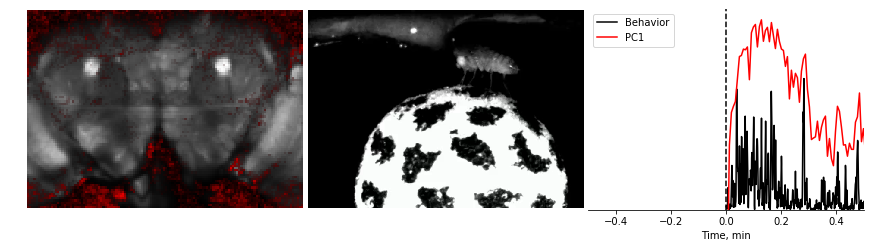

In [258]:
fig = plt.figure(figsize=(15,3.7))
i=0
###### PLOT 1 ######
plt.clf()
print(i)
plt.subplot(131)
plt.axis('off')
idx = np.searchsorted(indicies, i)
plt.imshow(meanbrain[:,:,25].T,cmap='gray')
activity = np.multiply(pca_spatial[:,:,25,0].T, pca_[0,idx]+0.02)

# Create an alpha channel based on weight values
# Any value whose absolute value is > value will have zero transparency
important_number = .15 # This value really changes how alpha channel overlay looks
alphas = Normalize(0, important_number, clip=True)(activity)
alphas = np.clip(alphas, 0, 1)  # alpha value clipped at the bottom

# Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
colors = Normalize(0, 1)(activity)
cmap = plt.cm.hot
colors = cmap(colors)

# Now set the alpha channel to the one we created above
colors[..., -1] = alphas
plt.imshow(colors[:,:],alpha=1)

###### PLOT 2 ######
plt.subplot(132)
plt.axis('off')
plt.imshow(frames[i][:460,:,:])

###### PLOT 3 ######
ax = plt.subplot(133)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
plt.xlabel('Time, min')

plt_idx = i*20/ms_to_min
ax.plot(xnew/ms_to_min, fictrac_interp*2,label='Behavior',color='k')
ax.plot(timestamps[:,25]/ms_to_min,pca_[0,:]+0.02,label='PC1',color='r')
ax.axvline(plt_idx,color='k',linestyle='--')
offset = 0.5
plt.xlim(plt_idx-offset,plt_idx+offset)
plt.ylim(0,.07)
plt.legend()

plt.subplots_adjust(wspace=.02, hspace=0)

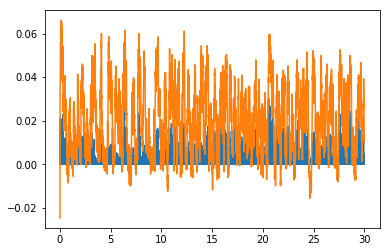

In [185]:
plt.plot(xnew/ms_to_min, fictrac_interp)
plt.plot(timestamps[:,25]/ms_to_min,pca_[0,:]+0.02)